# 环境准备

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 设置pandas可以显示的行数和列数
pd.options.display.max_rows = 400
pd.options.display.max_columns = None

# 忽略warnings
import warnings
warnings.filterwarnings("ignore")

#推荐安装插件： nbextensions

# 读入数据

In [2]:
# store:门店编号
# dept: 商品部门编号
# week: 每周周一的日期 
# sales: 销售金额
df_sales = pd.read_csv('data/store_sales.csv', parse_dates=['week'])
df_sales.head(2)

store  dept       week     sales
0      1     1 2010-02-01  24924.50
1      1     1 2010-02-08  46039.49

In [7]:
# 筛选1号店9部门的数据
df = df_sales[ (df_sales['store']==1) & (df_sales['dept']==9) ]

# 判断是否存在周期性

## 判断方式1： 可视化

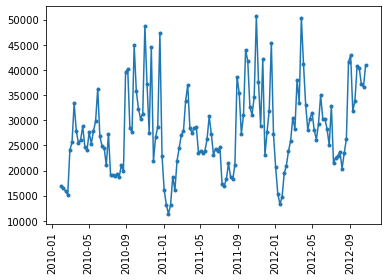

In [8]:
# 全时序图
plt.plot( df['week'], df['sales'],'.-' )
plt.xticks(rotation=90)
plt.show()

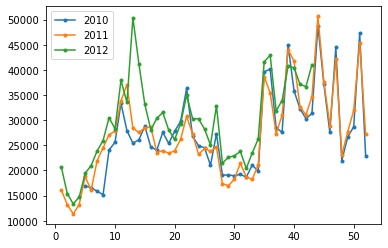

In [9]:
# 季节时序图
#计算每周属于哪一年
df['year'] = df['week'].dt.year

#计算每周为一年当中的第几周
df['week_of_year'] = df['week'].dt.weekofyear

for year in df['year'].unique():
    tmp_df = df[ df['year']==year ]
    plt.plot( tmp_df['week_of_year'], tmp_df['sales'],'.-', label=str(year) )
plt.legend()
plt.show()

## 判断方式2： ACF检验

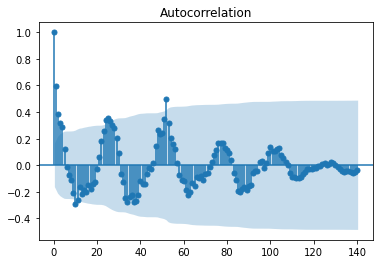

In [10]:
from  statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['sales'], lags=140).show()

结论：数据存在以52周（1年）为单位的周期性

# 用STL算法分解时间序列

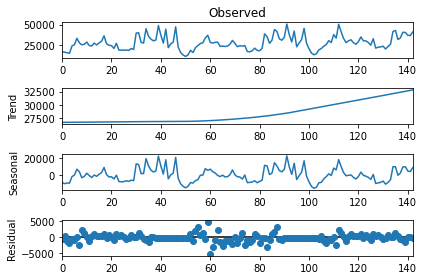

In [11]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['sales'].values, period=52) #period: 时间序列的周期
res = stl.fit()

## 分解结果可视化
fig = res.plot()